# 项目：TMDB电影数据集的分析报告

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

>电影数据库（TMDb）是社区构建的电影和电视数据库，本数据集由Kaggle采集自TMDb网页，本人利用此资源作为数据分析能力的练习。数据集中有一万多部电影的信息记录，包括电影的popularity（热度）、budget（预算）、revenue（票房）、cast（演员阵容）、director（导演）、keywords（主题）、runtime（时长）、genres（类型）、production_companies（出品公司）、vote_count（评论数）、vote_average（平均评分）、release_date（首映日期）和release_year（发行年份）等,稍后本人将根据分析内容对有效信息进行筛选和清洗。

> 电影投资商关心票房，观众关心电影品质，这两个要点的分别成功应该都是一部电影成功的标志，本次分析将尝试围绕以下问题探索电影成功的影响因素：

> 一、票房篇
<br />1、电影票房的top10是哪些？
<br />2、票房最高的电影类别是哪些？
<br />3、哪个导演是“高票房”导演？
<br />4、票房和人气、预算、电影时长、评论数、评分、的相关性如何？

> 二、评价篇
<br />1、电影评分的top10是哪些？
<br />2、评价最高的电影类别是哪些？
<br />3、哪个导演是“高质出品”导演？
<br />4、评分和票房、人气、预算、电影时长、评论数的相关性如何？

<a id='wrangling'></a>
## 数据整理



> **导入Python包**

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
import warnings
warnings.filterwarnings(action = 'ignore') # 忽略警告

### 常规属性

In [92]:
# 加载数据并打印几行，来检查数据
# 类型，以及是否有缺失数据或错误数据的情况。
data=pd.read_csv('tmdb-movies.csv')
data.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [93]:
#查看数据的样本数、列数和重复行数
print(data.shape)
print(data.duplicated().sum())

(10866, 21)
1


> 可知样本有10886行、21列;数据有一行重复行,后续将会对它进行删除。

In [94]:
#列的数据类型、有缺失值的列
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> 可知大部分列的值都比较完整，缺失较多的'homepage'、'tagline'、'keywords'、'production_companies'列并不是分析所需信息，后续将会和同样不是分析所需信息的'imdb_id '、'cast'、'overview'、'release_date'、'budget'、’revenue '列一起删除（因为'budget_adj '和'revenue_adj'列是考虑了通货膨胀后的更准确的列）。剩余的列数据类型都符合分析要求，无需更改，但后续要对有空值的行以及不合理数据进行删除和筛选。

> 在查看数据内容时发现大部分'genres'列不止有一个类别，'director'列并不一定只有一个导演，后续将对此进行处理。

### 数据清理

In [95]:
#删除重复行和无用列并检查
data.drop_duplicates(inplace=True)
print(data.duplicated().sum())
data.rename(columns=lambda x:x.strip().lower(),inplace=True)
data.drop(['homepage','tagline','keywords','production_companies','imdb_id','cast','overview','release_date','budget','revenue'],axis=1,inplace=True)
data.head(2)

0


,id,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08


In [96]:
#删除所有有空值的行并检查
data.dropna(axis=0,inplace=True)
print(data.isnull().sum().any())

False


In [97]:
#查看描述性统计数据
data.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,1.080000e+04,1.080000e+04
mean,65576.183426,0.649455,102.189722,218.600741,5.970880,2001.289537,1.765437e+07,5.167714e+07
std,91756.079939,1.002441,30.783873,577.165055,0.933006,12.819545,3.438403e+07,1.450182e+08
min,5.000000,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10570.500000,0.209157,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20460.000000,0.385471,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,74725.250000,0.717508,111.250000,147.000000,6.600000,2011.000000,2.103337e+07,3.408743e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [98]:
#评分人数（vote_count）过低的电影，其评分（vote_average）也不具有统计意义，这里筛选评分人数不小于30的数据。
#时长、预算等为0的数据也应该筛去,因为不合理。
data = data[(data.vote_count>=30)&(data.budget_adj * data.runtime * data.revenue_adj!=0)].reset_index(drop = 'True')
data.describe(),data.shape

(                  id   popularity      runtime   vote_count  vote_average  \
 count    3436.000000  3436.000000  3436.000000  3436.000000   3436.000000   
 mean    40980.158615     1.301776   109.711583   589.638533      6.216298   
 std     69486.447042     1.524791    19.846890   912.791062      0.774568   
 min         5.000000     0.010335    26.000000    30.000000      3.300000   
 25%      4639.500000     0.549694    96.000000   104.000000      5.700000   
 50%     10732.000000     0.902990   106.000000   253.000000      6.200000   
 75%     41485.500000     1.489320   120.000000   656.750000      6.800000   
 max    417859.000000    32.985763   338.000000  9767.000000      8.400000   
 
        release_year    budget_adj   revenue_adj  
 count   3436.000000  3.436000e+03  3.436000e+03  
 mean    2001.862922  4.734563e+07  1.511747e+08  
 std       11.068431  4.594460e+07  2.242853e+08  
 min     1960.000000  9.693980e-01  2.370705e+00  
 25%     1996.000000  1.519180e+07  2.518

In [99]:
#把'director'和'genres'列用'|'分隔的内容变成列表，方便后续分析；
#‘director列’只取第一个名字，大部分电影只有一位主导演，其他信息基本都是编剧、制作人等脏数据；
for i in range(len(data.director)):
    data.director.iloc[i]=data.director.iloc[i].split('|')[0]
data.head(2)

,id,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08


In [100]:
#‘genres'列的各个类别只取前三个关键字。
for i in range(len(data.genres)):
    data.genres.iloc[i]=data.genres.iloc[i].split('|')[:3]
data.head(2)

,id,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,"[Action, Adventure, Science Fiction]",5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,"[Action, Adventure, Science Fiction]",6185,7.1,2015,1.379999e+08,3.481613e+08


In [101]:
#对'director'进行空格清洗
data['director']=data['director'].map(str.strip)

### 初步探索

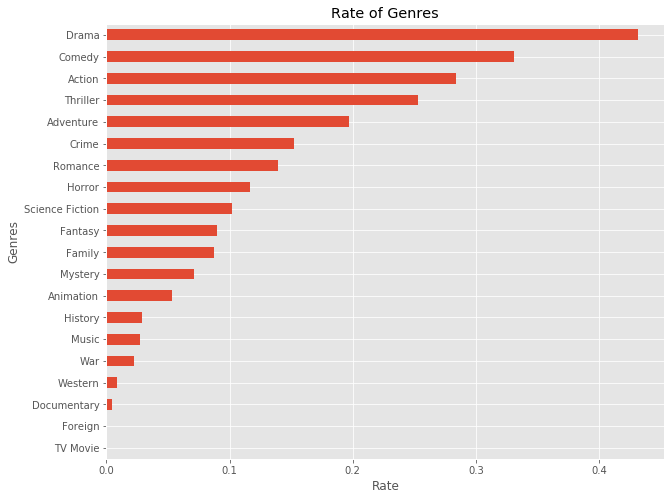

In [102]:
#探索电影类型的占比
def countN(column):
    count = dict()
    for row in column:
        for ele in row:
            if ele in count:
                count[ele] += 1
            else:
                count[ele] = 1
    return count
genres = pd.Series(countN(data.genres)).sort_values()
genres_avg = genres / len(data)
genres_avg.plot(kind='barh', title='Rate of Genres',figsize=(10,8));
plt.ylabel('Genres');
plt.xlabel('Rate');

> <br />剧情片是占比最大的电影类型，占到总量45%以上；其次是喜剧和动作片。

<a id='eda'></a>
## 探索性数据分析

### 研究问题 一：票房篇

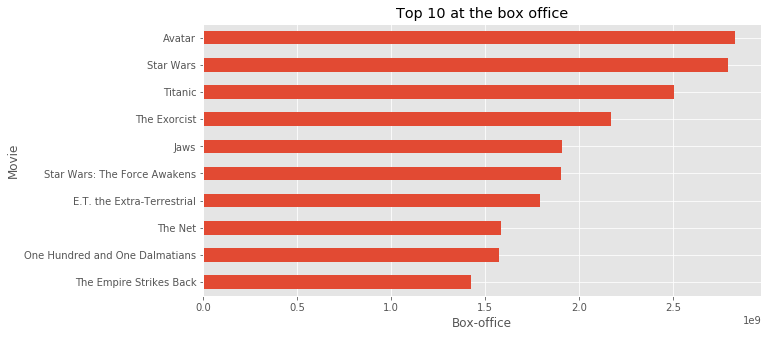

In [103]:
#1、电影票房的top10是哪些？
data_revenue_adj=data.groupby(['original_title']).revenue_adj.mean()
data_revenue_adj_10=data_revenue_adj.sort_values().tail(10)
data_revenue_adj_10.plot(kind='barh',figsize=(10,5));
plt.title('Top 10 at the box office');
plt.ylabel('Movie');
plt.xlabel('Box-office');

In [104]:
data.query('original_title=="Avatar"')

,id,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
329,19995,9.432768,Avatar,James Cameron,162,"[Action, Adventure, Fantasy]",8458,7.1,2009,2.408869e+08,2.827124e+09


In [105]:
data.query('original_title=="Star Wars"')

,id,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
317,11,12.037933,Star Wars,George Lucas,121,"[Adventure, Action, Science Fiction]",4428,7.9,1977,3.957559e+07,2.789712e+09


In [106]:
data.query('original_title=="Titanic"')

,id,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
1618,597,4.355219,Titanic,James Cameron,194,"[Drama, Romance, Thriller]",4654,7.3,1997,2.716921e+08,2.506406e+09


可以发现票房前两部的共同特点是动作片和冒险片，第三部是剧情片。

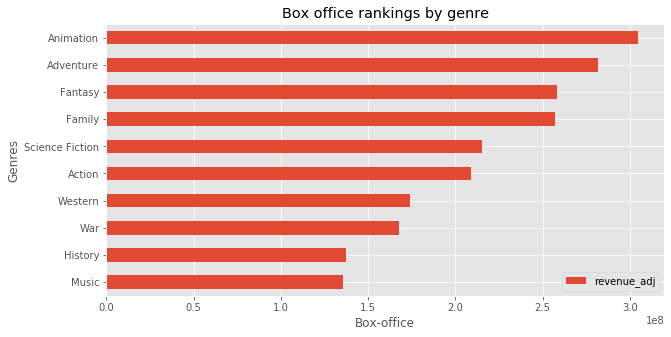

In [107]:
#2、票房最高的电影类别是哪些？
data_by_genres = pd.DataFrame(0, index = genres.index, columns=['revenue_adj'])#新建一个dataframe
for i in range(len(data)):
    for g in data.genres[i]:
        data_by_genres.loc[g] += data.revenue_adj[i] # 该类影片的总票房
data_by_genres = data_by_genres.div(genres.values, axis=0)#该类影片平均票房
#画图
data_by_genres_10=data_by_genres.sort_values('revenue_adj', ascending=True).tail(10)
data_by_genres_10.plot( kind='barh',figsize=(10,5));#排序并选前十绘图
plt.title('Box office rankings by genre');
plt.ylabel('Genres');
plt.xlabel('Box-office');

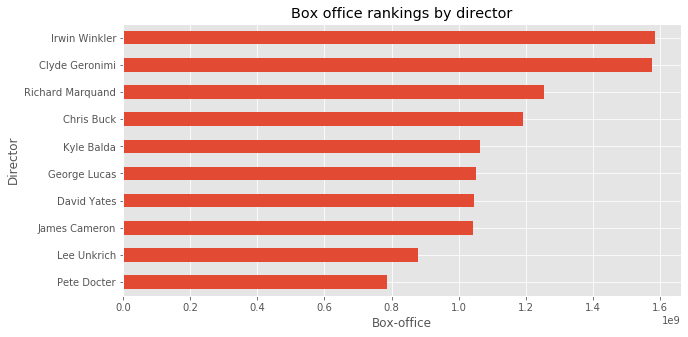

In [108]:
#3、哪个导演是“高票房”导演？
data_by_director=data.groupby(['director'])['revenue_adj'].mean()
#画图
data_by_director_10=data_by_director.sort_values().tail(10)
data_by_director_10.plot( kind='barh',figsize=(10,5));
plt.title('Box office rankings by director');
plt.ylabel('Director');
plt.xlabel('Box-office');

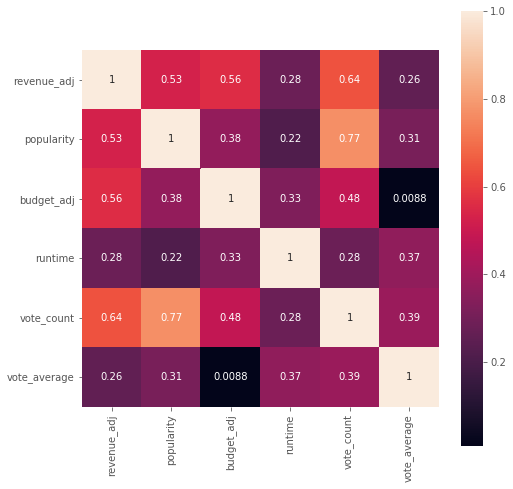

In [109]:
#4、票房和人气、预算、电影时长、评论数、评分、的相关性如何？
data_rela=data[['revenue_adj','popularity','budget_adj','runtime','vote_count','vote_average']]
sns.set_context({"figure.figsize":(8,8)})
sns.heatmap(data_rela.corr(), annot=True, vmax=1, square=True);

In [110]:
data.query('director=="Irwin Winkler"')

,id,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
2611,1642,1.13661,The Net,Irwin Winkler,114,"[Crime, Drama, Mystery]",201,5.6,1995,3.148127e+07,1.583050e+09


In [111]:
data.query('director=="Clyde Geronimi"')

,id,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
3254,12230,2.631987,One Hundred and One Dalmatians,Clyde Geronimi,79,"[Adventure, Animation, Comedy]",913,6.6,1961,2.917944e+07,1.574815e+09


In [112]:
data.query('director=="Richard Marquand"')

,id,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
2565,1892,4.828854,Return of the Jedi,Richard Marquand,135,"[Adventure, Action, Science Fiction]",3101,7.8,1983,7.082424e+07,1.253819e+09


### 结论一：票房篇

> 对电影票房进行可视化探索发现（以下结论只代表在此数据集中的分析）：
<br />1、近年来票房最高的电影是《阿凡达》,其次是《星球大战》和《泰坦尼克号》，其中第一和第三两部都是詹姆斯﹒卡梅隆导演执导，第二是乔治﹒卢卡斯导演执导；
<br />2、电影票房最高的类型是动画电影，其次是冒险电影和魔幻电影，看来老少皆宜的动画电影市场还是最大的；
<br />3、“高票房”导演是艾文·温克勒，经查询他以一部《网络上身》上榜，第二是导演克莱德·杰洛尼米，他以一部《101条斑点狗》上榜,第三是导演理查德﹒马昆德，他以一部《绝地反击》上榜。
<br />4、票房和评论数相关系数相对较大，投资和热度对票房也有一些影响。

### 研究问题 二：评价篇

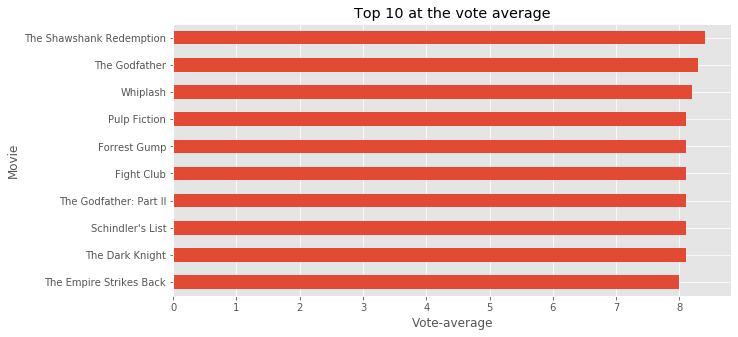

In [113]:
#1、电影评分的top10是哪些？
data_vote_average=data.groupby(['original_title']).vote_average.mean()
data_vote_average_10=data_vote_average.sort_values().tail(10)
data_vote_average_10.plot(kind='barh',figsize=(10,5));
plt.title('Top 10 at the vote average');
plt.ylabel('Movie');
plt.xlabel('Vote-average');

In [114]:
data.query('original_title=="The Shawshank Redemption"')

,id,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
1313,278,7.192039,The Shawshank Redemption,Frank Darabont,142,"[Drama, Crime]",5754,8.4,1994,3.677779e+07,4.169346e+07


In [115]:
data.query('original_title=="The Godfather"')

,id,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
2342,238,5.738034,The Godfather,Francis Ford Coppola,175,"[Drama, Crime]",3970,8.3,1972,3.128737e+07,1.277914e+09


In [116]:
data.query('original_title=="Whiplash"')

,id,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
178,244786,4.780419,Whiplash,Damien Chazelle,105,"[Drama, Music]",2372,8.2,2014,3.039600e+06,1.288891e+07


可以发现评价前三电影有一个共同点，都是剧情片。

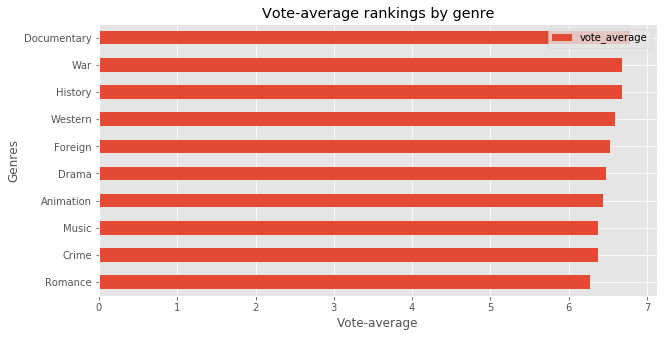

In [117]:
#2、评价最高的电影类别是哪些？
data_by_genres_2 = pd.DataFrame(0, index = genres.index, columns=['vote_average'])
for i in range(len(data)):
    for g in data.genres[i]:
        data_by_genres_2.loc[g] += data.vote_average[i] # 该类影片的总票房
data_by_genres_2= data_by_genres_2.div(genres.values, axis=0)

#画图
data_by_genres_2_10=data_by_genres_2.sort_values('vote_average', ascending=True).tail(10)
data_by_genres_2_10.plot( kind='barh',figsize=(10,5));
plt.title('Vote-average rankings by genre');
plt.ylabel('Genres');
plt.xlabel('Vote-average');

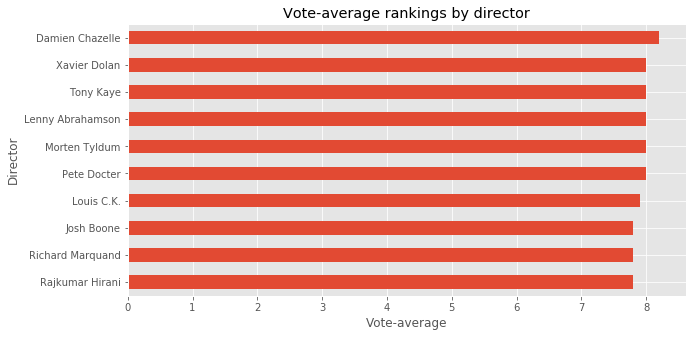

In [118]:
#3、哪个导演是“高质出品”导演？
data_by_director_2=data.groupby(['director'])['vote_average'].mean()
#画图
data_by_director_2_10=data_by_director_2.sort_values().tail(10)
data_by_director_2_10.plot( kind='barh',figsize=(10,5));
plt.title('Vote-average rankings by director');
plt.ylabel('Director');
plt.xlabel('Vote-average');

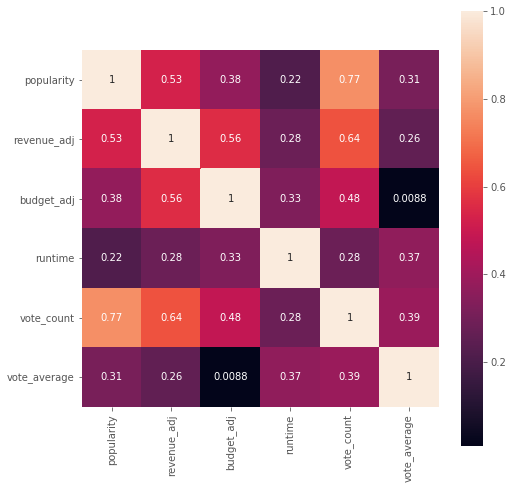

In [119]:
#4、评分和人气、预算、电影时长、评论数的相关性如何？
data_rela=data[['popularity','revenue_adj','budget_adj','runtime','vote_count','vote_average']]
sns.set_context({"figure.figsize":(8,8)})
sns.heatmap(data_rela.corr(), annot=True, vmax=1, square=True);

In [120]:
#票房最高电影与评价最高电影重复数
count=0
for i in data_revenue_adj_10.index:
    if i in data_vote_average_10.index:
        count+=1
        print(i)
count

The Empire Strikes Back


1

In [121]:
#票房最高导演与评价最高导演重复数
count=0
for i in data_by_director_10.index:
    if i in data_by_director_2_10.index:
        count+=1
        print(i)
count

Pete Docter
Richard Marquand


2

In [122]:
data.query('director=="Damien Chazelle"')

,id,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
178,244786,4.780419,Whiplash,Damien Chazelle,105,"[Drama, Music]",2372,8.2,2014,3.039600e+06,1.288891e+07


In [123]:
data.query('director=="Xavier Dolan"')

,id,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
236,265177,1.737699,Mommy,Xavier Dolan,138,[Drama],389,8.0,2014,4.513346e+06,3.218357e+06


In [124]:
data.query('director=="Tony Kaye"')

,id,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
2929,73,1.333006,American History X,Tony Kaye,119,[Drama],1563,8.0,1998,2.675391e+07,3.193765e+07


In [125]:
data.query('director=="Pete Docter"')

,id,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
9,150540,6.326804,Inside Out,Pete Docter,94,"[Comedy, Animation, Family]",3935,8.0,2015,1.609999e+08,7.854116e+08


### 结论二：评价篇

> 对电影评价进行可视化探索发现(以下结论只代表在此数据集中的分析)：
<br />1、评价最高的电影是弗兰克·德拉邦特导演执导的《肖申克的救赎》,其次是弗朗西斯·福特·科波拉导演执导的《教父》和达米恩·查泽雷导演执导的《爆裂鼓手》；票房前十的电影只有1部在评分最高前十,由此可见高票房并不代表高评分。
<br />2、评分最高的类型是纪录片，其次是战争电影和历史电影，和票房最高的前三完全类不同（因为分类数较少，只比较前三）；可看出票房最高的前三类都是感官刺激性强的电影；而评价最高的三类都是纪实文化型电影。
<br />3、“高质出品”导演是达米恩·查泽雷导演，以一部《爆裂鼓手》上榜；其次是泽维尔·多兰导演，以一部《妈咪》上榜；第三是托尼·凯耶导演，以一部《美国X档案》上榜。票房前十的导演有2位在评分最高前十，可见大部分导演在“名”、“利”之间都只专攻其一，也有少数“名利双收”的导演。
<br />4、评分和所有因素的相关系数都不大，特别是投资，看来电影品质高低与“大制作”并无太大关系。
<br />5、在电影类型中剧情片占比最多，高达45%，但它在高票房、高评分电影种类前三中并未入榜；经分析发现高票房、高评分的前三电影中共有4部都是剧情片，剧情片高产的原因跃然纸上，然而可能就是因为电影高产但品质参差不齐，所以剧情片均值并不突出。

<a id='conclusions'></a>
## 结论

> 总结以上结论，除了知道排名情况，还可得出几个结论（以下结论只代表在此数据集中的分析）：
<br />1、电影高票房并不代表高评分、高品质；
<br />2、成就高票房的因素很多，比如热度、“大制作”等，从高票房的电影种类来看感官刺激性强的电影容易把观众带进影院；
<br />3、而高评分却和这些因素关系不大，从高评分的电影种类来看，电影高评分的直接影响因素是电影纪实性的内容；
<br />4、大部分导演都很难在“高票房”和“高评价”中“名利双收”，只能“术业有专攻”，所以也就有观众们口中的“商业片导演”和“文艺片导演”之分。
<br />5、动画电影票房整体最高，纪录片整体评价最好，而剧情片是最出彩的类型。